In [1]:
#Data Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textblob
import nltk
import wordcloud
from nltk.probability import FreqDist
from wordcloud import WordCloud
from collections import Counter


In [2]:
from textblob import TextBlob
from nltk.stem.wordnet import WordNetLemmatizer
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
import string
import emoji
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

In [3]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score

In [4]:
import pandas as pd
df = pd.read_csv('C:\\Users\\HP\\Desktop\\AI ASSIGMNET\\New folder\\Emotions\\train.csv', encoding='latin1')
df.head(10)

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral,night,70-100,Antigua and Barbuda,97929,440.0,223
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive,morning,0-20,Argentina,45195774,2736690.0,17
7,50e14c0bb8,Soooo high,Soooo high,neutral,noon,21-30,Armenia,2963243,28470.0,104
8,e050245fbd,Both of you,Both of you,neutral,night,31-45,Australia,25499884,7682300.0,3
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive,morning,46-60,Austria,9006398,82400.0,109


## Dropping unwanted columns

In [5]:
def drop_unwanted_columns(df):
    columns_to_drop = ['textID','text', 'Time of Tweet', 'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)']
    df = df.drop(columns_to_drop, axis=1)
    return df
df = drop_unwanted_columns(df)
df.head(10)

,selected_text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD,negative
2,bullying me,negative
3,leave me alone,negative
4,"Sons of ****,",negative
5,http://www.dothebouncy.com/smf - some shameles...,neutral
6,fun,positive
7,Soooo high,neutral
8,Both of you,neutral
9,Wow... u just became cooler.,positive


## Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   selected_text  27480 non-null  object
 1   sentiment      27481 non-null  object
dtypes: object(2)
memory usage: 429.5+ KB


In [7]:
print(df['sentiment'].value_counts())

neutral     11118
positive     8582
negative     7781
Name: sentiment, dtype: int64


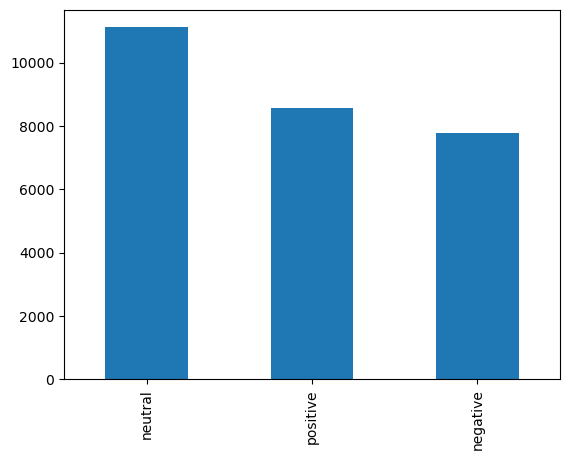

In [8]:
df['sentiment'].value_counts().plot(kind='bar')
plt.show()

count    27481.000000
mean        36.681234
std         35.680581
min          1.000000
25%          8.000000
50%         22.000000
75%         55.000000
max        158.000000
Name: length, dtype: float64


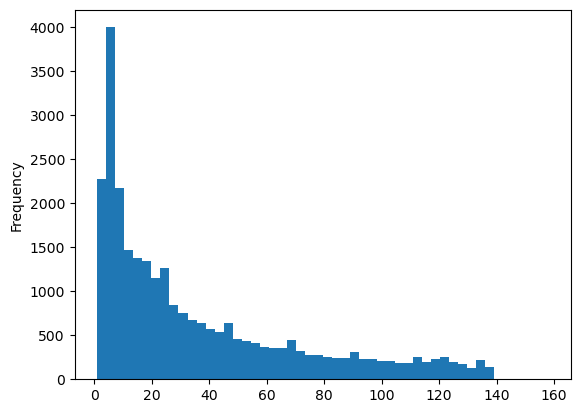

In [9]:
df['length'] = df['selected_text'].astype(str).apply(len)
print(df['length'].describe())
df['length'].plot(kind='hist', bins=50)
plt.show()

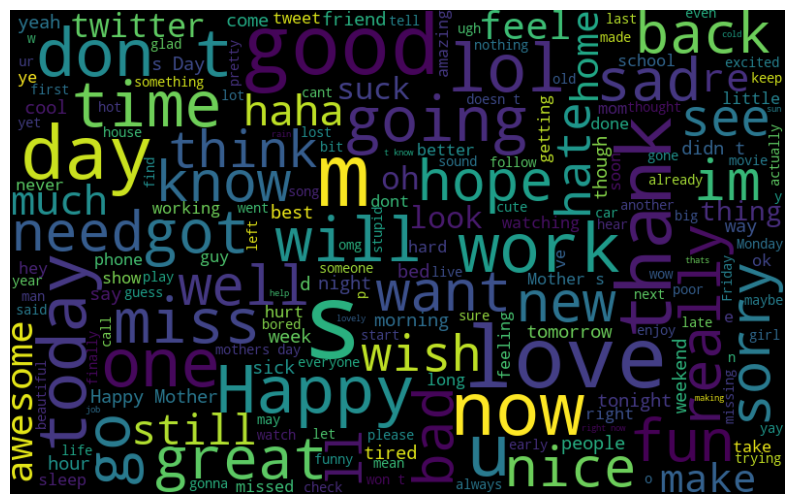

In [10]:
all_words = ' '.join(df['selected_text'].astype(str))
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

count    27481.000000
mean         7.094465
std          6.891356
min          1.000000
25%          1.000000
50%          4.000000
75%         11.000000
max         33.000000
Name: word_count, dtype: float64


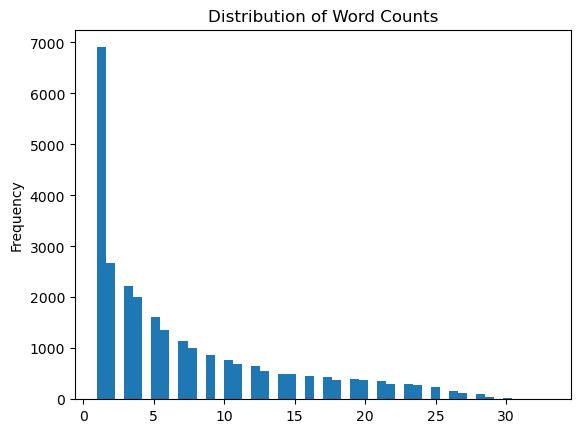

In [11]:
df['word_count'] = df['selected_text'].apply(lambda x: len(str(x).split()))
print(df['word_count'].describe())
df['word_count'].plot(kind='hist', bins=50)
plt.title('Distribution of Word Counts')
plt.show()

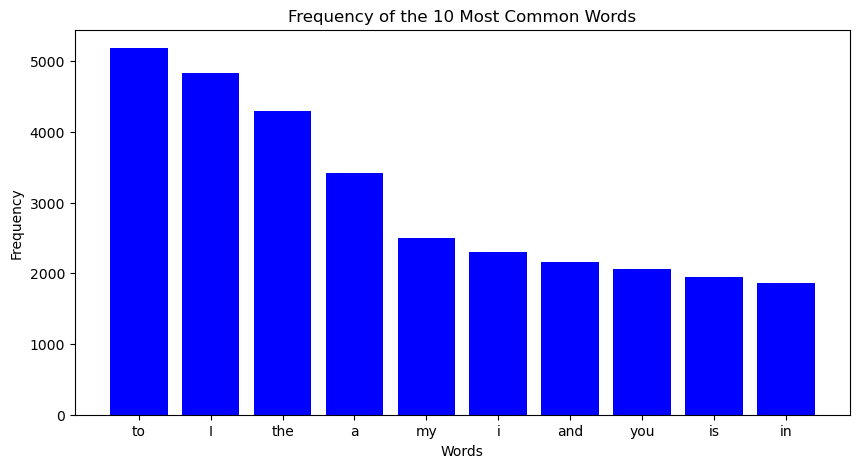

In [12]:
all_words = [word for tweet in df['selected_text'].astype(str) for word in tweet.split()]
word_counts = Counter(all_words)
common_words = word_counts.most_common(10)
words, counts = zip(*common_words)

plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='b')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency of the 10 Most Common Words')
plt.show()

# Preprocessing

## Cleaning the data

In [13]:
def clean_text(text):

    text = str(text).lower()
    
    # Remove Twitter handles
    text = re.sub('@\w+', '', text)
    
    # Remove text in square brackets
    text = re.sub('\[.*?\]', '', text)
    
    # Remove URLs
    text = re.sub('https?://\S+|www\.\S+', '', text)
    
    # Remove HTML tags
    text = re.sub('<.*?>+', '', text)
    
    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    
    # Remove new line characters
    text = re.sub('\n', '', text)
    
    # Remove words that contain numbers
    text = re.sub('\w*\d\w*', '', text)
    
    # Convert emojis to words
    text = emoji.demojize(text, delimiters=(" ", " "))
    
    return text

In [14]:
print("Data before preprocessing")
df['selected_text'].head(5)

Data before preprocessing


0    I`d have responded, if I were going
1                               Sooo SAD
2                            bullying me
3                         leave me alone
4                          Sons of ****,
Name: selected_text, dtype: object

In [15]:
df['cleaned_text'] = df['selected_text'].apply(clean_text)
print("Data after preprocessing")
print(df['cleaned_text'].head(5))

Data after preprocessing
0    id have responded if i were going
1                             sooo sad
2                          bullying me
3                       leave me alone
4                             sons of 
Name: cleaned_text, dtype: object


## Tokenization

In [16]:
def tokenize_text(df, column_name='cleaned_text'):
    df['tokenized_text'] = df[column_name].apply(word_tokenize)
    return df
df = tokenize_text(df, 'cleaned_text')
print("Data after tokenization")
print(df['tokenized_text'].head(5))

Data after tokenization
0    [id, have, responded, if, i, were, going]
1                                  [sooo, sad]
2                               [bullying, me]
3                           [leave, me, alone]
4                                   [sons, of]
Name: tokenized_text, dtype: object


## Removing Stop Words

In [17]:
stop_words = set(stopwords.words('english'))
print("The stop words are\n",stop_words)

The stop words are
 {'and', "shouldn't", "should've", 'd', 'have', 'why', 'is', 'same', 'any', 'before', "hasn't", 'himself', 'having', 'only', 'our', 'very', 'wasn', 'then', 'most', 'hasn', 'your', "don't", 'am', 'while', 'not', "wouldn't", 'ain', 'its', 'should', 'needn', 'he', 'so', 'between', 'theirs', 'do', 'm', 'against', 'now', 'yourself', 'just', 'through', 'his', 'because', 'such', "mightn't", 'ma', 'mustn', 'a', 'from', 'down', 'themselves', 'won', 'does', "couldn't", 'can', 'was', "wasn't", "isn't", 'her', 'll', 'their', 'these', 'some', 'isn', 'after', 'you', 'been', 'during', 'to', 'about', 'had', 'my', 'o', "won't", "that'll", 'it', 'shan', 've', 'y', 'the', 'which', 'those', 'again', 'how', 'myself', 'weren', 'once', "mustn't", "weren't", 'too', 'are', 'yours', 'own', 'that', 'hadn', "shan't", 'but', 'both', 'other', 'don', 'didn', 'were', 'wouldn', "it's", 'being', 'haven', 'ourselves', 'further', 'here', 'ours', 'out', 'all', 'over', 'yourselves', 'what', "you'd", 'doi

In [18]:
def remove_stopwords(df, column_name='tokenized_text'):
    df[column_name] = df[column_name].apply(lambda x: [word for word in x if word not in stop_words])
    return df
df = remove_stopwords(df, 'tokenized_text')
print(df['tokenized_text'].head(5))

0    [id, responded, going]
1               [sooo, sad]
2                [bullying]
3            [leave, alone]
4                    [sons]
Name: tokenized_text, dtype: object


## POS Tagging

In [19]:
def pos_tagging(df,colummn_name='tokenized_text'):
    df['pos_tagged_text'] = df['tokenized_text'].apply(lambda x: nltk.pos_tag(x))
    return df
df=pos_tagging(df, 'tokenized_text')
print("Data after POS tagging")
print(df['pos_tagged_text'].head(5))

Data after POS tagging
0    [(id, NN), (responded, VBD), (going, VBG)]
1                       [(sooo, NN), (sad, NN)]
2                              [(bullying, NN)]
3                    [(leave, VB), (alone, RB)]
4                                 [(sons, NNS)]
Name: pos_tagged_text, dtype: object


## Lemmatization

In [20]:
def lemmatize_text(df):
    lemmatizer = WordNetLemmatizer()
    df['lemmatized_text'] = df['pos_tagged_text'].apply(lambda x: [lemmatizer.lemmatize(word[0]) for word in x])
    return df
df = lemmatize_text(df)
print("Data after Lemmatization")
print(df['lemmatized_text'].head(5))

Data after Lemmatization
0    [id, responded, going]
1               [sooo, sad]
2                [bullying]
3            [leave, alone]
4                     [son]
Name: lemmatized_text, dtype: object


In [21]:
df.head(5)

,selected_text,sentiment,length,word_count,cleaned_text,tokenized_text,pos_tagged_text,lemmatized_text
0,"I`d have responded, if I were going",neutral,35,7,id have responded if i were going,"[id, responded, going]","[(id, NN), (responded, VBD), (going, VBG)]","[id, responded, going]"
1,Sooo SAD,negative,8,2,sooo sad,"[sooo, sad]","[(sooo, NN), (sad, NN)]","[sooo, sad]"
2,bullying me,negative,11,2,bullying me,[bullying],"[(bullying, NN)]",[bullying]
3,leave me alone,negative,14,3,leave me alone,"[leave, alone]","[(leave, VB), (alone, RB)]","[leave, alone]"
4,"Sons of ****,",negative,13,3,sons of,[sons],"[(sons, NNS)]",[son]


## Preparing Test Data

In [22]:
df2= pd.read_csv('C:\\Users\\HP\\Desktop\\AI ASSIGMNET\\New folder\\Emotions\\test.csv', encoding='latin1')
df2.head(10)

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0
5,726e501993,that`s great!! weee!! visitors!,positive,night,70-100,Antigua and Barbuda,97929.0,440.0,223.0
6,261932614e,I THINK EVERYONE HATES ME ON HERE lol,negative,morning,0-20,Argentina,45195774.0,2736690.0,17.0
7,afa11da83f,"soooooo wish i could, but im in school and my...",negative,noon,21-30,Armenia,2963243.0,28470.0,104.0
8,e64208b4ef,and within a short time of the last clue all ...,neutral,night,31-45,Australia,25499884.0,7682300.0,3.0
9,37bcad24ca,What did you get? My day is alright.. haven`...,neutral,morning,46-60,Austria,9006398.0,82400.0,109.0


In [23]:
columns_to_drop = ['textID', 'Time of Tweet', 'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)']
df2 = df2.drop(columns_to_drop, axis=1)
df2.head(5)

,text,sentiment
0,Last session of the day http://twitpic.com/67ezh,neutral
1,Shanghai is also really exciting (precisely -...,positive
2,"Recession hit Veronique Branquinho, she has to...",negative
3,happy bday!,positive
4,http://twitpic.com/4w75p - I like it!!,positive


In [24]:
df2['cleaned_text'] = df2['text'].apply(clean_text)
df2 = tokenize_text(df2, 'cleaned_text')
df2 = remove_stopwords(df2, 'tokenized_text')
df2 = pos_tagging(df2, 'tokenized_text')
df2 = lemmatize_text(df2)

In [25]:
df2.head(5)

,text,sentiment,cleaned_text,tokenized_text,pos_tagged_text,lemmatized_text
0,Last session of the day http://twitpic.com/67ezh,neutral,last session of the day,"[last, session, day]","[(last, JJ), (session, NN), (day, NN)]","[last, session, day]"
1,Shanghai is also really exciting (precisely -...,positive,shanghai is also really exciting precisely s...,"[shanghai, also, really, exciting, precisely, ...","[(shanghai, NN), (also, RB), (really, RB), (ex...","[shanghai, also, really, exciting, precisely, ..."
2,"Recession hit Veronique Branquinho, she has to...",negative,recession hit veronique branquinho she has to ...,"[recession, hit, veronique, branquinho, quit, ...","[(recession, NN), (hit, VBD), (veronique, JJ),...","[recession, hit, veronique, branquinho, quit, ..."
3,happy bday!,positive,happy bday,"[happy, bday]","[(happy, JJ), (bday, NN)]","[happy, bday]"
4,http://twitpic.com/4w75p - I like it!!,positive,i like it,[like],"[(like, IN)]",[like]


In [26]:
df.head(5)

,selected_text,sentiment,length,word_count,cleaned_text,tokenized_text,pos_tagged_text,lemmatized_text
0,"I`d have responded, if I were going",neutral,35,7,id have responded if i were going,"[id, responded, going]","[(id, NN), (responded, VBD), (going, VBG)]","[id, responded, going]"
1,Sooo SAD,negative,8,2,sooo sad,"[sooo, sad]","[(sooo, NN), (sad, NN)]","[sooo, sad]"
2,bullying me,negative,11,2,bullying me,[bullying],"[(bullying, NN)]",[bullying]
3,leave me alone,negative,14,3,leave me alone,"[leave, alone]","[(leave, VB), (alone, RB)]","[leave, alone]"
4,"Sons of ****,",negative,13,3,sons of,[sons],"[(sons, NNS)]",[son]


## Training Logistic Model

In [27]:
df['lemmatized_text_str'] = df['lemmatized_text'].apply(' '.join)
df2['lemmatized_text_str'] = df2['lemmatized_text'].apply(' '.join)

In [29]:
df['sentiment'] = df['sentiment'].astype(str)
df2['sentiment'] = df2['sentiment'].astype(str)


In [31]:
df = df.dropna()
df2 = df2.dropna()

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(df['lemmatized_text_str'])
y_train = df['sentiment']
X_test = vectorizer.transform(df2['lemmatized_text_str'])
y_test = df2['sentiment']
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.73      0.39      0.51      1001
     neutral       0.51      0.87      0.64      1430
    positive       0.85      0.44      0.58      1103

    accuracy                           0.60      3534
   macro avg       0.70      0.56      0.58      3534
weighted avg       0.68      0.60      0.58      3534



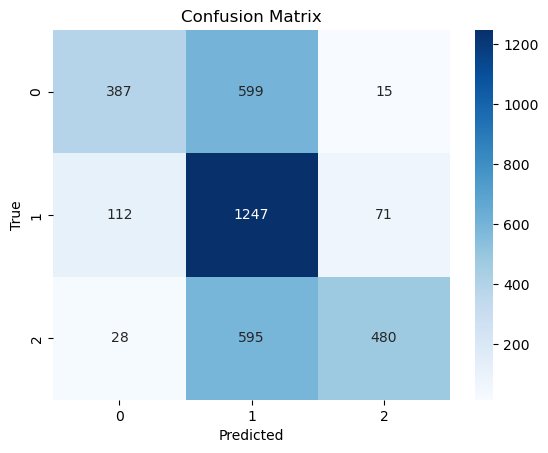

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [34]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

f2_score = fbeta_score(y_test, y_pred, beta=2, average='weighted')
print("F2 Score:", f2_score)

Accuracy: 0.5981890209394454
Precision: 0.6794030651032139
Recall: 0.5981890209394454
F2 Score: 0.5805841066749821


## Training Naive Bias Model


              precision    recall  f1-score   support

    negative       0.84      0.28      0.42      1001
     neutral       0.49      0.93      0.64      1430
    positive       0.85      0.35      0.49      1103

    accuracy                           0.57      3534
   macro avg       0.73      0.52      0.52      3534
weighted avg       0.70      0.57      0.53      3534



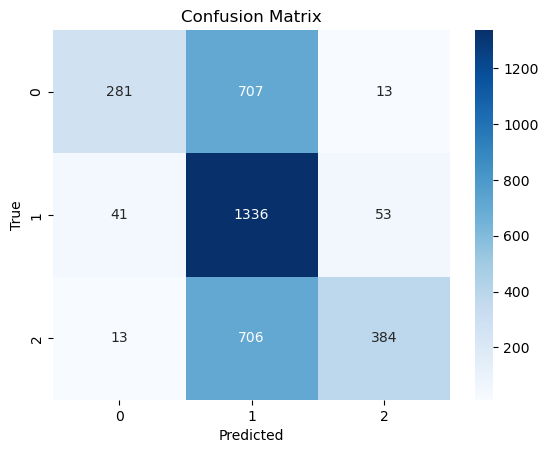

In [35]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_y_pred = nb_model.predict(X_test)
print(classification_report(y_test, nb_y_pred))
cmnb = confusion_matrix(y_test, nb_y_pred)
sns.heatmap(cmnb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



In [36]:
accuracy_nb = accuracy_score(y_test, nb_y_pred)
print("Accuracy:", accuracy_nb)
precision_nb = precision_score(y_test, nb_y_pred, average='weighted')   
print("Precision:", precision_nb)
recall_nb = recall_score(y_test, nb_y_pred, average='weighted')
print("Recall:", recall_nb)
f2_score_nb = fbeta_score(y_test, nb_y_pred, beta=2, average='weighted')
print("F2 Score:", f2_score_nb)


Accuracy: 0.566213921901528
Precision: 0.7005784267509434
Recall: 0.566213921901528
F2 Score: 0.5341342244001019
